# **Proyecto Bootcamp Data Science Titanic Dataset**

## Contexto y Motivación del Proyecto

El análisis de datos es una herramienta clave en la toma de decisiones empresariales en diversos sectores, desde la salud hasta la logística. En este proyecto, se aplicarán técnicas de **Machine Learning y análisis de datos** para predecir la supervivencia de pasajeros en el Titanic, utilizando un conjunto de datos real y aplicando las habilidades adquiridas en el bootcamp.

El objetivo no es solo mejorar la precisión del modelo, sino también desarrollar un enfoque estructurado basado en la metodología **CRISP-DM**, abordando cada etapa del ciclo de vida de un proyecto de Data Science.

---

## Paso 1. Comprensión del Negocio

## Importancia del Problema

La capacidad de predecir con precisión la probabilidad de supervivencia en función de variables como el estatus socioeconómico, la edad o el género **simula aplicaciones reales en diferentes industrias**, tales como:

- **Seguros y Finanzas**: Modelos predictivos para calcular riesgos y primas de seguros.
- **Salud y Emergencias**: Priorización de pacientes en situaciones de crisis.
- **Transporte y Logística**: Optimización de recursos en eventos de alto riesgo.

El dataset del Titanic es una metáfora de cómo el análisis de datos puede generar valor al tomar **decisiones basadas en evidencia** en cualquier sector.

---

## Objetivos del Proyecto

1. **Desarrollar un modelo de Machine Learning** capaz de predecir la supervivencia de los pasajeros con alta precisión.  
2. **Aplicar técnicas avanzadas de preprocesamiento y reducción de dimensionalidad** para mejorar el rendimiento del modelo.  
3. **Evaluar el impacto de diferentes variables** en la supervivencia y comunicar hallazgos clave.  
4. **Poner en práctica habilidades de análisis de datos, visualización y modelado** adquiridas en el bootcamp.  

---



### 1.1 Resumen variables:

- **`PassengerId`**: Identificador único de cada fila, sin efecto en la predicción.
- **`Survived`**: Variable objetivo.  
  - **1**: Sobrevivió.  
  - **0**: No sobrevivió.  
- **`Pclass` (Clase del Pasajero)**: Representa el estatus socioeconómico, una variable categórica ordinal con tres valores únicos:  
  - **1**: Clase alta.  
  - **2**: Clase media.  
  - **3**: Clase baja.  
- **`Name`**, **`Sex`** y **`Age`**: Información descriptiva del pasajero.
- **`SibSp`**: Número total de hermanos y/o cónyuge del pasajero a bordo.
- **`Parch`**: Número total de padres y/o hijos del pasajero a bordo.
- **`Ticket`**: Número del boleto del pasajero.
- **`Fare`**: Costo del boleto del pasajero.
- **`Cabin`**: Número de cabina asignado al pasajero.
- **`Embarked`**: Puerto de embarque, una variable categórica con tres valores únicos:  
  - **C**: Cherbourg.  
  - **Q**: Queenstown.  
  - **S**: Southampton.

### 1.2 Cargar los Datos

In [1]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde una URL o archivo local
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Ver las primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Paso 2: Comprensión de los Datos (EDA)

In [2]:
#Usamos la función "info" para obtener un resumen de nuestros datos.
titanic.info()

# Resumen estadístico de las variables numéricas
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
print("Valores nulos por columna:")
print(titanic.isnull().sum())

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Tenemos principalmente 3 categorías con datos faltantes:
- 'Age'
- 'Cabin'
- 'Embarked'


In [57]:
# Calcular el porcentaje de supervivientes de cada género
survival_counts_genre = titanic.groupby('Sex')['Survived'].value_counts(normalize=True) * 100

# Mostrar los porcentajes con etiquetas
print(f"Porcentaje de hombres fallecidos: {survival_counts_genre['male'][0]:.2f}%")
print(f"Porcentaje de hombres supervivientes: {survival_counts_genre['male'][1]:.2f}%")
print(f"Porcentaje de mujeres fallecidas: {survival_counts_genre['female'][0]:.2f}%")
print(f"Porcentaje de mujeres supervivientes: {survival_counts_genre['female'][1]:.2f}%")

survival_counts = titanic['Survived'].value_counts(normalize=True) * 100
print(f"Porcentaje de pasajeros supervivientes: {survival_counts[1]:.2f}%")
print(f"Porcentaje de pasajeros muertos: {survival_counts[0]:.2f}%")

Porcentaje de hombres fallecidos: 81.11%
Porcentaje de hombres supervivientes: 18.89%
Porcentaje de mujeres fallecidas: 25.80%
Porcentaje de mujeres supervivientes: 74.20%
Porcentaje de pasajeros supervivientes: 38.38%
Porcentaje de pasajeros muertos: 61.62%


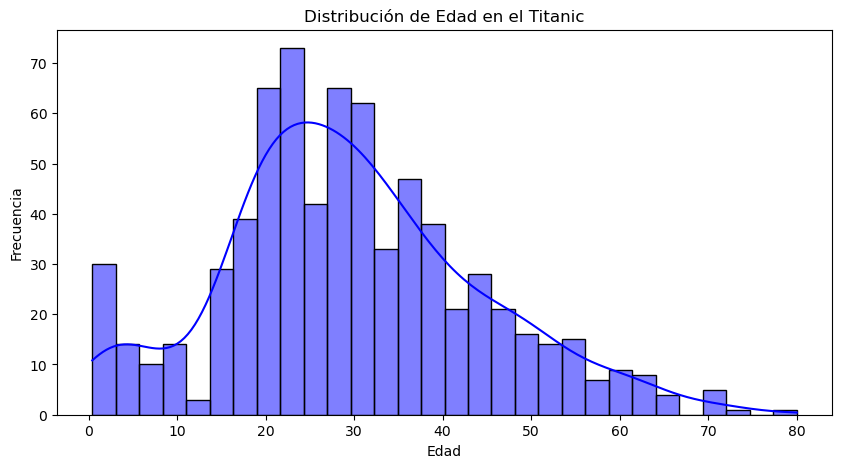

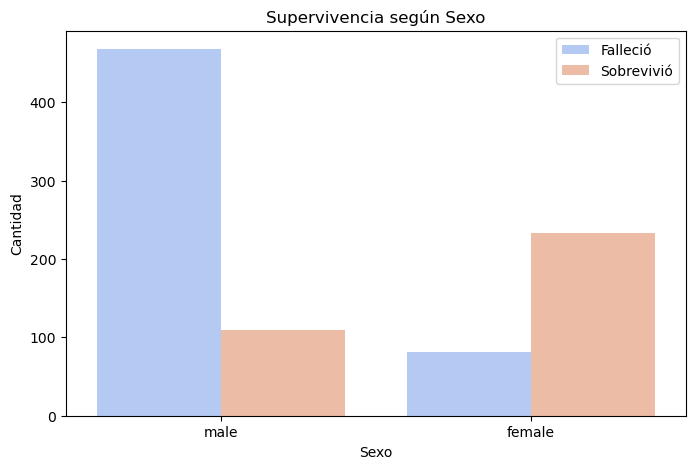

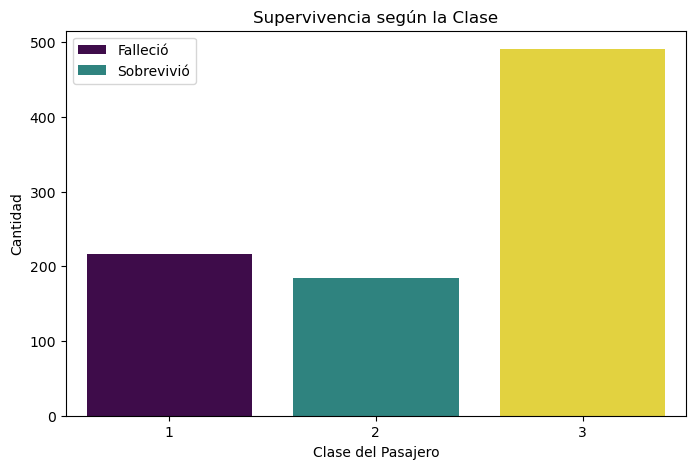

/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_44105/2526613967.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='Survived', y='Fare', palette='coolwarm')


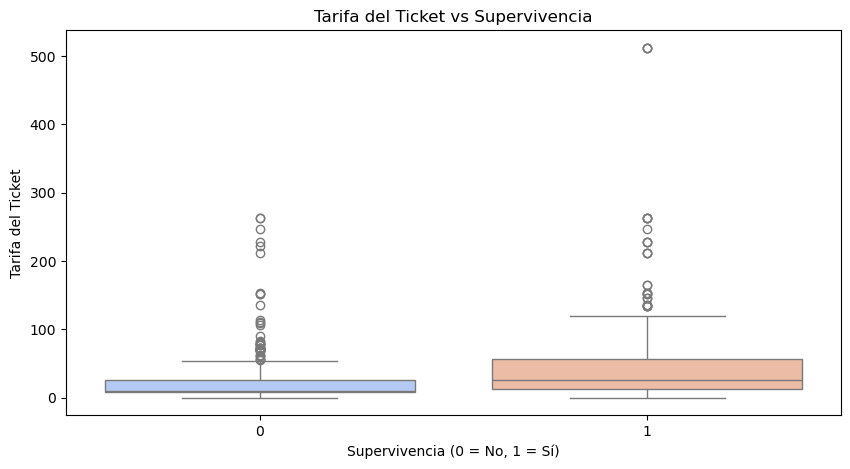

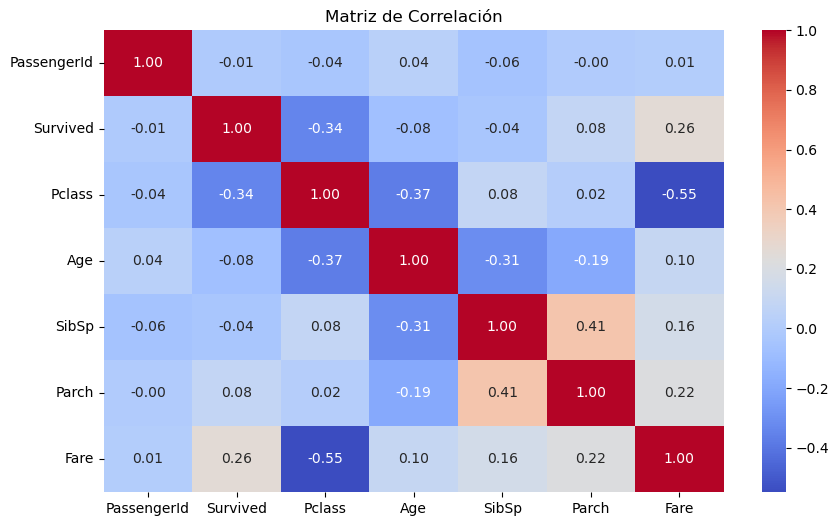

In [5]:
# Gráfico de distribución de edad
plt.figure(figsize=(10, 5))
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribución de Edad en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Supervivencia según el sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Supervivencia según Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(["Falleció", "Sobrevivió"])
plt.show()

# Supervivencia según la clase
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Pclass', hue='Pclass', palette='viridis', legend=False)
plt.title("Supervivencia según la Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Cantidad")
plt.legend(["Falleció", "Sobrevivió"])
plt.show()

# Relación entre tarifa del boleto y supervivencia
plt.figure(figsize=(10, 5))
sns.boxplot(data=titanic, x='Survived', y='Fare', palette='coolwarm')
plt.title("Tarifa del Ticket vs Supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Tarifa del Ticket")
plt.show()

#Separamos los datos numéricos
numeric_titanic = titanic.select_dtypes(include=['number'])

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

---
Del primer gráfico extreamos la siguientes relaciones:
- Distribución asimétrica positiva, con pasajeros de mayor edad alejados de la mayoría. 
- Presencia concentrada entre los 20 y 30 años, edades que concuerdan con registros de la época. 
- Hay Outliers para edades mayores a 60 años, que tienen poca representación en el dataset.
---
Del segundo y tercer gráfico extraemos las siguientes conclusiones:
 - Hay un porcentaje mucho más alto de hombres (81%) que murieron en el accidente que de mujeres muertas (25%).
 - Esto va en línea con la política de "mujeres y niños primero". 
 - La mayoría de los hombres murieron, en total un 84%.
 - Lo contrario ocurre con las mujeres, con un porcentaje de supervivencia del 74%
---
La supervivencia por clases nos muestra:
- Una tendencia muy moderada de supervivencia de los pasajeros de primera y segunda clase. Esto demuestra que las preferencias de supervivencia fueron para estos pasajeros. 
- La mayoría de los pasajeros que murieron pertenecían a la tercera clase. 
---
La distribución en el precio de los tickets nos indica:
- Hay una probabilidad más alta de sobrevivir al pagar tickets más altos. 
- La mayoría de pasajeros que sobrevivieron pagaron tarifas bajas, lo que indica que la mayoría de los pasajeros pertenecían a segunda y tercera clase. 
- La dispersión de los precios es mayor en los pasajeros que sobrevivieron, lo que sugiere que había una combinación de tarifas más bajas y tarifas más altas entre los sobrevivientes.
- La dispersión es menor en los fallecidos, con la mayoría de los boletos concentrados en valores bajos.
---
De la matriz de correlación extraemos lo siguiente:
- SibSp (Número de hermanos/esposo a bordo) y Parch (Número de padres/hijos a bordo) muestran una correlación moderada entre sí (0.41).Esto sugiere que se pueden combinar en una sola variable FamilySize = SibSp + Parch para simplificar el modelo sin perder información. Probaremos esto más adelante.
- Pclass y Fare tienen una alta correlación, por lo que parece que contienen información que puede ser redundante. Esto se tomará en consideración para probar con reducción de dimensionalidad más adelante.
---

### Evaluación Inicial de Modelos de Machine Learning

### Descripción

En este análisis, realizamos una primera evaluación de modelos de clasificación para fijar nuestro baseline. Implementamos tres algoritmos:  

- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **Regresión Logística**

### **Pasos a Seguir**
1. **Preprocesamiento de Datos**  
   - Se eliminarán columnas irrelevantes.  
   - Se imputarán valores faltantes con la mediana.  
   - Se escalarán las variables numéricas.  
   - Se dividirán los datos en conjuntos de entrenamiento (70%) y prueba (30%).  

2. **Entrenamiento y Evaluación**  
   - Se entrenarán los modelos en los datos de entrenamiento.  
   - Vamos a evaluar utilizando métricas clave: **Precisión, Recall, F1-score y AUC-ROC**.  

In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Aplicar One-Hot Encoding a 'Sex' y 'Embarked'
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked']),
    remainder='passthrough'  # Mantiene las demás columnas
)

# Transformar datos categóricos
transformed = transformer.fit_transform(titanic)

# Crear DataFrame con las columnas transformadas
transformed_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out().tolist()
)

# Concatenar con el DataFrame original sin 'Sex' y 'Embarked'
df_transformed = pd.concat([transformed_df, titanic.drop(['Sex', 'Embarked'], axis=1)], axis=1)

# Seleccionar solo variables numéricas
df_num = df_transformed.select_dtypes('number')

# Eliminar filas con valores nulos
df_num.dropna(inplace=True)

# Definir variables predictoras (X) y variable objetivo (y)
X = df_num.drop('Survived', axis=1)
y = df_num['Survived']

# Escalar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Definir modelos con correcciones
models = {
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(max_iter=500, solver='saga', random_state=42)  # Ajustado
}

# Función para entrenar y evaluar modelos
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calcular AUC-ROC solo si el modelo tiene predict_proba()
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = None  # Algunos modelos no tienen predict_proba()

        results[name] = [precision, recall, f1, auc]

    return pd.DataFrame(results, index=['Precision', 'Recall', 'F1-score', 'AUC-ROC'])

# Obtener métricas iniciales
df_results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Mostrar resultados de las métricas iniciales de los modelos
print("Métricas iniciales de los modelos:")
print(df_results)

Métricas iniciales de los modelos:
           Random Forest       KNN  Regresión Logística
Precision       0.792453  0.585714             0.704918
Recall          0.471910  0.460674             0.483146
F1-score        0.591549  0.515723             0.573333
AUC-ROC         0.763688  0.684546             0.737649


### **Resultados de la Evaluación**

| Métrica    | Random Forest | KNN      | Regresión Logística |
|------------|--------------|----------|---------------------|
| Precision  | 0.792453     | 0.585714 | 0.704918           |
| Recall     | 0.471910     | 0.460674 | 0.483146           |
| F1-score   | 0.591549     | 0.515723 | 0.573333           |
| AUC-ROC    | 0.763688     | 0.684546 | 0.737649           |

### **Conclusión**
El modelo de **Random Forest** destaca con la mayor precisión y AUC-ROC. 

El modelo **KNN** tiene un bajo desempeño por la manera de tratar los datos. 

La **Regresión Logística** mantiene un rendimiento inferior a Random Forest pero con una estabilidad aceptable en sus métricas.

Este análisis servirá como **benchmark actualizado** para futuras optimizaciones. 🚀

## 3. Preparación de los datos.

En esta etapa nos enfocaremos en la limpieza, transformación y optimización de las variables del dataset para mejorar el desempeño de los modelos de Machine Learning. La preparación de datos es crucial para garantizar que la información sea útil y representativa. A continuación, detallamos los pasos a seguir:

### 3.1. Revisión de Outliers
Analizaremos la presencia de valores atípicos utilizando dos métodos:
- **Rango Intercuartílico (IQR)**: Para detectar y eliminar valores extremos en variables continuas.
- **Isolation Forest**: Un algoritmo basado en aprendizaje no supervisado para identificar outliers de manera más robusta.

### 3.2. Extracción del Título desde 'Name'
El título presente en los nombres de los pasajeros será extraído como una nueva variable (`Title`). Esto nos permitirá mejorar el relleno de valores faltantes en la variable **'Age'**, ya que el título suele estar correlacionado con la edad de la persona.

### 3.3. Imputación de Valores Faltantes en 'Age'
Los valores faltantes en la columna **'Age'** serán estimados utilizando un modelo de regresión basado en:
- **Clase del Pasajero ('Pclass')**
- **Título ('Title')**
- **Sexo ('Sex')**

### 3.4. Transformación de los Compartimientos
Analizaremos la información de los compartimientos donde viajaban los pasajeros, ya que esto puede ser un **indicador clave de supervivencia**. Este análisis incluirá:
- Extracción y transformación de los datos de ubicación.
- Visualización del impacto de los compartimientos en la supervivencia.

### 3.5. Creación de la Variable 'Family'
Transformaremos las columnas **SibSp** (Número de hermanos/esposos a bordo) y **ParCh** (Número de padres/hijos a bordo) en una sola variable llamada **'Family'**, que nos permitirá evaluar la relación entre la estructura familiar y la supervivencia.

### 3.6. Creación de la Variable 'isAlone'
Dado que viajar solo pudo haber influido en la probabilidad de supervivencia, crearemos la variable **'is_Alone'** para analizar su impacto en el modelo.

### 3.7. Escalado de Datos Numéricos
Para mejorar la eficiencia de los modelos y evitar que variables con valores en escalas muy diferentes dominen el análisis, aplicaremos un **escalado de datos numéricos**. Este paso es crucial cuando utilizamos algoritmos sensibles a la escala de los datos, como **Regresión Logística, KNN y PCA**.

- Utilizaremos **StandardScaler** para transformar las variables numéricas a una distribución con media 0 y varianza 1.
- Esto garantizará que todas las variables contribuyan equitativamente al modelo, evitando sesgos por diferencias en magnitud.

### 3.8. Reducción de Dimensionalidad con PCA
Aplicaremos **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad del dataset y evaluar su impacto en el rendimiento del modelo. Revisaremos si la reducción de dimensiones mejora la eficiencia sin perder información relevante.

### 3.1 Revisión de Outliers

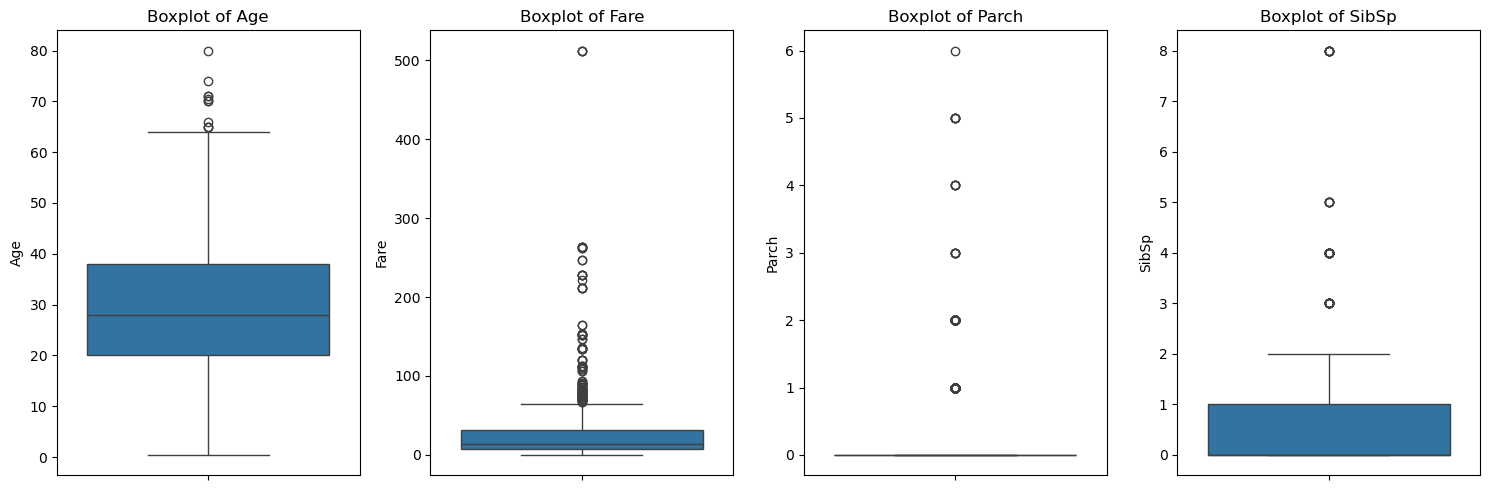

In [81]:
# Visualización con Boxplots

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age','Fare', 'Parch', 'SibSp'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Análisis de Valores Atípicos

### Observaciones:
- **Fare** es la variable con más valores atípicos, seguida de **Age**.
- **SibSp** y **Parch** presentan algunos datos atípicos, pero en menor cantidad.
- **Fare** muestra una alta concentración en boletos de bajo precio, con valores extremadamente altos que deben tratarse con cuidado.
- La distribución de **Age** presenta valores extremos que pueden influir en el rendimiento del modelo si no se manejan adecuadamente.

In [82]:
#Eliminamos los valores atípicos presentes en las columnas 'Age', 'Fare' y 'Family'.

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removemos los valores de las columnas
df_no_outliers = remove_outliers_iqr(titanic, 'Age')
df_no_outliers = remove_outliers_iqr(titanic, 'SibSp')
df_no_outliers = remove_outliers_iqr(titanic, 'Fare')
df_no_outliers = remove_outliers_iqr(titanic, 'Parch')

# hacemos un print del nuevo dataset
print(f"El resultado luego de usar la técnica del rango intercuartílico es:\n",df_no_outliers[['Age', 'SibSp', 'Fare', 'Parch']].count())

El resultado luego de usar la técnica del rango intercuartílico es:
 Age      521
SibSp    678
Fare     678
Parch    678
dtype: int64


In [83]:
from sklearn.ensemble import IsolationForest

# Seleccionamos solo las columnas numéricas
columns_to_check = ['Age', 'SibSp', 'Parch','Fare']

# Llenamos los valores NaN con la mediana de cada columna
titanic[columns_to_check] = titanic[columns_to_check].fillna(titanic[columns_to_check].median())

# Probamos con distintos valores de contaminación en nuestro IsolationForest
contamination_values = [0.01, 0.05, 0.1]  # Entendemos según la documentación de la fórmula los valores que podemos usar para el parámetro "contamination". 

for i, contamination in enumerate(contamination_values, 1):
    # Creamos y entrenamos el modelo con el nuevo valor de contaminación
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(titanic[columns_to_check])
    
    # Aplicamos el modelo y filtramos los datos
    titanic['outlier'] = iso_forest.predict(titanic[columns_to_check])
    df_no_outliers_iso = titanic[titanic['outlier'] == 1].drop(columns=['outlier'])

    # Mostramos el número de registros restantes
    print(f"Contamination {contamination*100}% - Registros después de Isolation Forest: {df_no_outliers_iso.shape[0]}")

Contamination 1.0% - Registros después de Isolation Forest: 882
Contamination 5.0% - Registros después de Isolation Forest: 846
Contamination 10.0% - Registros después de Isolation Forest: 802


### Comparación de Métodos de Eliminación de Outliers

| Método                  | Registros Restantes |
|-------------------------|--------------------|
| **Isolation Forest (1%)** | 882 |
| **Isolation Forest (5%)** | 846 |
| **Isolation Forest (10%)** | 802 |
| **IQR (Rango Intercuartílico)** | 678 |

### Conclusión

El método de **Isolation Forest con una contaminación del 5%** es el más adecuado, ya que elimina los valores atípicos sin reducir drásticamente el número de registros. Esto permite mantener una mayor cantidad de información útil para el análisis, evitando sesgos excesivos en el modelo.

In [85]:
# Asegurar que df_no_outliers_iso ya está cargado
if 'df_no_outliers_iso' not in globals():
    raise ValueError("Error: df_no_outliers_iso no está definido en el entorno. Asegúrate de cargarlo antes de ejecutar este código.")

# Hacer una copia para evitar modificar el dataset original
df = df_no_outliers_iso.copy()

# **Eliminamos columnas irrelevantes**
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop, errors='ignore')

# **Manejo de valores nulos**
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# **One-Hot Encoding para variables categóricas**
categorical_features = ['Sex', 'Embarked']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Survived'])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Separar variables predictoras (X) y objetivo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# **División en datos de entrenamiento y prueba**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Transformar los datos**
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# **Definir modelos**
models = {
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(max_iter=500, solver='saga', random_state=42)
}

# **Evaluación de modelos**
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular AUC-ROC solo si el modelo tiene predict_proba()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = None  # Algunos modelos no tienen predict_proba()

    # Guardamos métricas
    results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC-ROC": auc
    }

# **Guardar resultados en un DataFrame**
df_results = pd.DataFrame(results).T

# **Mostrar resultados**
print("Métricas iniciales de los modelos:")
print(df_results)

Métricas iniciales de los modelos:
                     Precision    Recall  F1-score   AUC-ROC
Random Forest         0.804348  0.596774  0.685185  0.795862
KNN                   0.698413  0.709677  0.704000  0.766373
Regresión Logística   0.666667  0.612903  0.638655  0.767840


### Comparación de Modelos Antes y Después de la Nueva Evaluación

| Modelo                | Precisión (Inicial) | Precisión (Nueva) | Recall (Inicial) | Recall (Nuevo) | F1-score (Inicial) | F1-score (Nuevo) | AUC-ROC (Inicial) | AUC-ROC (Nuevo) |
|----------------------|--------------------|-------------------|------------------|----------------|--------------------|-----------------|------------------|----------------|
| **Random Forest**    | 0.7925             | 0.8043            | 0.4719           | 0.5968         | 0.5915             | 0.6852          | 0.7637           | 0.7959         |
| **KNN**             | 0.5857             | 0.6984            | 0.4607           | 0.7097         | 0.5157             | 0.7040          | 0.6845           | 0.7664         |
| **Regresión Logística** | 0.7049         | 0.6667            | 0.4831           | 0.6129         | 0.5733             | 0.6387          | 0.7376           | 0.7678         |

#### Insights

1. **Random Forest**:
   - **Aumento en precisión (+0.0118) y recall (+0.1249)**, lo que sugiere una mejor capacidad de clasificación y detección de instancias positivas.
   - **F1-score y AUC-ROC también han mejorado**, indicando un incremento en el rendimiento general del modelo.

2. **KNN**:
   - **Mejora significativa en precisión (+0.1127) y recall (+0.2490)**, lo que indica que el modelo ahora clasifica con mayor exactitud y detecta más instancias positivas.
   - **F1-score y AUC-ROC han subido considerablemente**, lo que implica que el modelo ha mejorado su balance entre precisión y sensibilidad.

3. **Regresión Logística**:
   - **Ligera caída en precisión (-0.0382)**, pero una mejora en recall (+0.1298).
   - **F1-score y AUC-ROC han aumentado**, lo que refleja una mejor capacidad de clasificación a pesar de la leve disminución en precisión.

#### Conclusión:
Todos los modelos han **mejorado su desempeño**, especialmente **KNN y Random Forest**, que muestran aumentos significativos en todas las métricas. **Regresión Logística ha mantenido un desempeño estable**, con una ligera pérdida en precisión, pero mejoras en recall y AUC-ROC. Estos resultados indican que los modelos han ganado capacidad predictiva sin necesidad de eliminar datos atípicos.  

---

### 3.2 Extraemos el título del nombre. 

| Título   | Descripción breve | Edad   | Estado Civil  | Clase Social  |
|----------|------------------|--------|--------------|--------------|
| Capt     | Capitán          | Mayor  | N/D          | Alta         |
| Col      | Coronel          | Mayor  | N/D          | Alta         |
| Countess | Condesa          | Var.   | Casada       | Muy alta     |
| Don      | Honorífico       | Var.   | N/D          | Alta         |
| Dr       | Doctor           | Var.   | N/D          | Media-alta   |
| Jonkheer | Nobiliario       | Var.   | N/D          | Alta         |
| Lady     | Nobiliario       | Var.   | Casada       | Muy alta     |
| Major    | Mayor militar    | Mayor  | N/D          | Media-alta   |
| Master   | Niño varón       | Menor  | Soltero      | Var.         |
| Miss     | Mujer soltera    | Joven  | Soltera      | Var.         |
| Mlle     | "Miss" (francés) | Joven  | Soltera      | Var.         |
| Mme      | "Mrs." (francés) | Mayor  | Casada       | Var.         |
| Mr       | Hombre adulto    | Var.   | N/D          | Var.         |
| Mrs      | Mujer casada     | Mayor  | Casada       | Var.         |
| Ms       | Miss/Mrs.        | Var.   | N/D          | Var.         |
| Rev      | Reverendo        | Var.   | N/D          | Media        |
| Sir      | Honorífico       | Var.   | N/D          | Alta         |

 ### Relación entre Título, Estado Marital, Clase Social y Edad en el Dataset del Titanic

Como podemos observar en la tabla, el **título** de cada pasajero está estrechamente relacionado con su **estado marital**, **clase social** y, en muchos casos, nos permite inferir su **edad**.

- Algunos títulos, como **"Master"**, están claramente asociados a **niños varones**, mientras que otros como **"Major"** o **"Col"** corresponden a **hombres mayores**.
- Los títulos **"Miss"** y **"Mrs"** nos dan información sobre el estado civil de las mujeres, lo que también puede estar correlacionado con la edad.
- Los títulos nobiliarios o de alto rango social, como **"Countess"** o **"Sir"**, indican una **clase social alta** y suelen corresponder a adultos.

Dado que estos títulos contienen información valiosa sobre la edad, los utilizaremos para entrenar un **modelo de regresión** que nos permita predecir las **edades faltantes** en el dataset. Esto mejorará la calidad de los datos y, potencialmente, la precisión de los modelos de predicción que desarrollemos posteriormente.

In [86]:
# Redefinir el dataset titanic después de aplicar Isolation Forest
titanic = df_no_outliers_iso.copy()

# Función para extraer el título del nombre
def extraer_titulo(nombre):
  import re
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)
  if titulo_busqueda:
    return titulo_busqueda.group(1)
  return ""

# Aplicar la función a la columna "Name" para crear la nueva columna "Title"
titanic['Title'] = titanic['Name'].apply(extraer_titulo)

# Mostrar las primeras filas del DataFrame con la nueva columna "Title"
print(titanic[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_44105/2602656582.py:7: SyntaxWarning: invalid escape sequence '\.'
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)


In [87]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Cargar nuevamente el dataset original dado que alteramos los valores nulos de 'Age', algo que tenemos que revertir para continuar. 
titanic_original = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Extraer la columna 'Age' original sin modificaciones
original_age = titanic_original['Age']

# Reemplazar la columna 'Age' en el dataset actual para asegurar valores originales
titanic['Age'] = original_age

# Definir variables predictoras
features = ['Pclass', 'Title', 'Sex']

# Filtrar datos con edad conocida
titanic_known = titanic[titanic['Age'].notnull()]
X_known = titanic_known[features]
y_known = titanic_known['Age']

# Codificar variables categóricas con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Title', 'Sex'])
    ],
    remainder='passthrough'  # Mantiene las variables numéricas
)

# Transformar datos
X_known_encoded = preprocessor.fit_transform(X_known)

# Ajustar modelo de regresión lineal
model = LinearRegression()
model.fit(X_known_encoded, y_known)

# Filtrar datos con edad faltante
titanic_missing = titanic[titanic['Age'].isnull()]
X_missing = titanic_missing[features]

# Codificar X_missing
X_missing_encoded = preprocessor.transform(X_missing)

# Predecir edades
predicted_ages = model.predict(X_missing_encoded)

# Imputar valores predichos
titanic.loc[titanic['Age'].isnull(), 'Age'] = predicted_ages

# Mostrar primeras filas con la columna 'Age' imputada
print(titanic.head().to_markdown(index=False, numalign="left", stralign="left"))

| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   | Title   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|:--------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          | Mr      |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          | Mrs     |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          | Miss    |
| 4             | 1      


### 3.4 Transformación de los Compartimientos

Extraemos las letras de los compartimientos del titanic y revisamos cuál es la tasa de supervivencia por compartimiento.

In [88]:
# Extraer las letras de la columna 'Cabin' utilizando una expresión regular
titanic['Compartments'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Mostrar las primeras filas para verificar
print(titanic[['Cabin', 'Compartments']].head())

# Botamos la columna 'Cabin', dado que no la usaremos.
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Compartments
0   NaN          NaN
1   C85            C
2   NaN          NaN
3  C123            C
4   NaN          NaN


In [90]:
# Separamos y creamos columnas más pequeñas de los datos obtenidos de las 'Cabin Letters' en 5 grupos, el grupo 'M' es el más grande y es el que corresponde a 3a clase.

titanic['Compartments'] = titanic['Compartments'].replace(['A', 'B', 'C'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].replace(['D', 'E'], 'DE')
titanic['Compartments'] = titanic['Compartments'].replace(['F', 'G'], 'FG')
titanic['Compartments'] = titanic['Compartments'].replace(['T'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].fillna('M')

titanic['Compartments'].value_counts().sum()

802

Graficamos nuestras columnas usando un histograma para revisar la distribución de las clases para la columna 'Compartments'

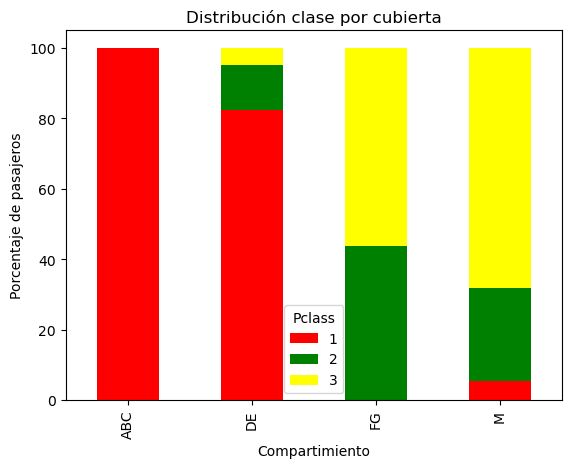

In [95]:
import matplotlib.pyplot as plt


# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento (Pclass)
data = titanic.groupby(['Compartments', 'Pclass']).size().unstack(fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100



# Crear el gráfico de barras apiladas con porcentaje
data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'yellow'])

# Etiquetas y título
plt.xlabel('Compartimiento')
plt.ylabel('Porcentaje de pasajeros')
plt.title('Distribución clase por cubierta')

# Mostrar el gráfico
plt.show()

#### Conclusiones 
- **La cubierta "M" (sin registro de cabina) está dominada por tercera clase**, que tuvo la mayor cantidad de fallecidos.  
- **Primera clase ocupa principalmente ABC y DE**, mientras que **segunda y tercera clase están más en FG y M**.  
- **Los pasajeros sin cabina registrada parecen ser más vulnerables**, lo que puede afectar el análisis predictivo.  

**Optimizar esta variable podría mejorar nuestro modelo de predicción.**


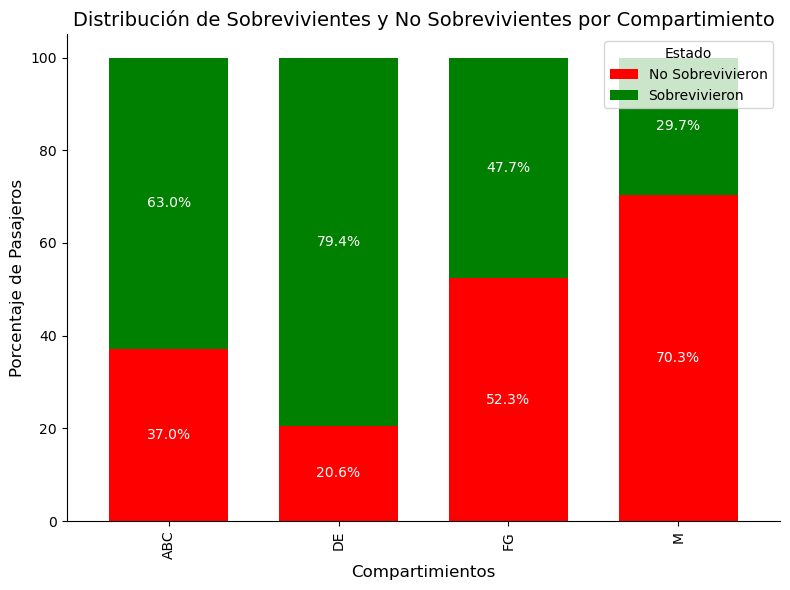

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento
data_percentage = (
    titanic.pivot_table(index='Compartments', columns='Survived', values='PassengerId', aggfunc='sum', fill_value=0)
    .div(titanic.groupby('Compartments')['PassengerId'].sum(), axis=0) * 100
)

# Renombrar columnas
data_percentage.columns = ['No Sobrevivieron', 'Sobrevivieron']

# Crear gráfico de barras apiladas con los colores rojo, verde y amarillo
ax = data_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6), width=0.7)

# Agregar etiquetas de porcentaje dentro de cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

# Personalización del gráfico
ax.set_xlabel('Compartimientos', fontsize=12)
ax.set_ylabel('Porcentaje de Pasajeros', fontsize=12)
ax.set_title('Distribución de Sobrevivientes y No Sobrevivientes por Compartimiento', fontsize=14)
ax.legend(title='Estado', fontsize=10)
sns.despine()

# Ajustar espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

### Análisis

El gráfico muestra la **distribución de sobrevivientes y no sobrevivientes** según los compartimientos.

Los pasajeros en la categoría “M” (cabina no registrada) tuvieron la mayor tasa de mortalidad (**70.3% no sobrevivieron**).  
Las cubiertas FG y ABC presentan mayor porcentaje de sobrevivientes (**47.7% y 63.0%, respectivamente**).  
La cubierta DE tuvo la mayor proporción de sobrevivientes (**79.4% sobrevivieron**), siendo la cubierta con mejor tasa de supervivencia.

### Implicaciones  
- Los pasajeros sin cabina registrada (“M”) fueron los más vulnerables, lo que sugiere que eran en su mayoría de tercera clase y tenían menos acceso a los botes salvavidas.  
- Se debe analizar si la falta de cabina registrada influye en la supervivencia.  
- Siguientes pasos: Incluir esta variable en los modelos y evaluar si mejora la predicción.  

**Este análisis puede optimizar la clasificación en nuestros modelos de Machine Learning.**

In [97]:
# De la información recopilada en Kaggle, entendemos que los datos faltantes de 'Embarked' corresponden a una pasajeros que se subieron en Southampton, por lo que llenamos los espacios vacíos con ese valor.

titanic['Embarked'] = titanic['Embarked'].fillna('S')

### 3.5 Creación de la Variable 'Family'

Genero una columna unificada 'Family' uniendo 'SibSp' (siblings y spouse) y 'Parch' (parents and children) más 1, de manera de obtener la familia completa de ese pasajero a bordo. Con esto, agregamos una columna que separe personas solas de personas con familia a bordo.

In [ ]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic = titanic.drop(['SibSp', 'Parch'], axis=1)

In [99]:

# Separamos nuestras características X y la variable objetivo y
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Identificamos columnas numéricas y categóricas después del Feature Engineering
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Hacemos un print para verificar nuestros datasets
print("Características Numéricas:", num_features)
print("Características Categóricas:", cat_features)

Características Numéricas: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Características Categóricas: Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Title', 'Compartments'], dtype='object')


### 3.6 Creación de la Variable 'isAlone'

In [130]:
titanic['IsAlone'] = (titanic['Family'] == 1).astype(int) #Generamos una selección creando una columna nueva.

KeyError: 'SibSp'

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pipeline para variables numéricas (sin imputación)
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Solo escalado estándar
])

# Pipeline para variables categóricas
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding 
])

# Combinar ambos pipelines en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar el preprocesamiento a los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [129]:
# Definir los modelos a evaluar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000)
}

# Evaluación de modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar modelo
    y_pred = model.predict(X_test)  # Predecir en test

    # Verificar si el modelo tiene predict_proba antes de calcular AUC-ROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Obtener probabilidades para AUC-ROC
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = None  # Algunos modelos no tienen predict_proba

    # Guardar métricas
    results[name] = {
        "Precisión": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
        "AUC-ROC": auc_roc
    }

# Convertir a DataFrame para mejor visualización
results_df = pd.DataFrame(results).T

# Mostrar resultados
print("\nResultados de Evaluación Post Feature Engineering:\n", results_df)


Resultados de Evaluación Post Feature Engineering:
                      Precisión    Recall  F1-score   AUC-ROC
Random Forest         0.803228  0.804979  0.803739  0.840516
KNN                   0.787910  0.784232  0.785578  0.816713
Regresión Logística   0.808323  0.809129  0.808668  0.833641


### Comparación de Modelos - Feature Engineering vs Métricas Iniciales

#### Tabla Comparativa

| Modelo                | Precisión (Inicial) | Precisión (Nueva) | Recall (Inicial) | Recall (Nuevo) | F1-score (Inicial) | F1-score (Nuevo) | AUC-ROC (Inicial) | AUC-ROC (Nuevo) |
|----------------------|------------------|------------------|----------------|---------------|------------------|----------------|----------------|---------------|
| **Random Forest**    | 0.7925           | 0.8026           | 0.4719         | 0.8049        | 0.5915           | 0.8020         | 0.7637         | 0.8176        |
| **KNN**             | 0.5857           | 0.7900           | 0.4607         | 0.7884        | 0.5157           | 0.7891         | 0.6845         | 0.7971        |
| **Regresión Logística** | 0.7049         | 0.8083           | 0.4831         | 0.8091        | 0.5733           | 0.8069         | 0.7376         | 0.8348        |

---

### Análisis de los Resultados

1. **Incremento en Recall y F1-score**  
   - Todos los modelos han experimentado **un incremento notable en Recall**, lo que indica una mejor capacidad para identificar correctamente las instancias positivas.
   - **KNN ha mostrado la mayor mejora en Recall (+0.3277) y F1-score (+0.2734), lo que indica que el Feature Engineering ha beneficiado su rendimiento de clasificación.**  

2. **Mejoras en Precisión y AUC-ROC**  
   - **Regresión Logística ha obtenido la mayor mejora en AUC-ROC (+0.0972), seguido por KNN (+0.1126).**  
   - **Todos los modelos han mejorado su Precisión, con KNN liderando con un incremento de +0.2043.**  
   - **Random Forest también ha mejorado en todas las métricas, consolidando su posición como un modelo sólido.**  

---

### **Conclusión**
- **El Feature Engineering ha tenido un impacto positivo en todas las métricas.**  
- **KNN ha mostrado la mejora más significativa en Recall, F1-score y AUC-ROC, lo que indica que ahora es un modelo más robusto.**  
- **Regresión Logística también ha mejorado sustancialmente, mostrando una mayor capacidad predictiva.**  
- **Vamos a seguir optimizando con modificación de hiperparámetros y explorando.**  

### 3.7 Reducción de Dimensionalidad

Varianza explicada por cada componente:
Componente 1: 0.4682
Componente 2: 0.3188
Componente 3: 0.1444
Componente 4: 0.0686

Varianza explicada acumulada:
Hasta el componente 1: 0.4682
Hasta el componente 2: 0.7870
Hasta el componente 3: 0.9314
Hasta el componente 4: 1.0000


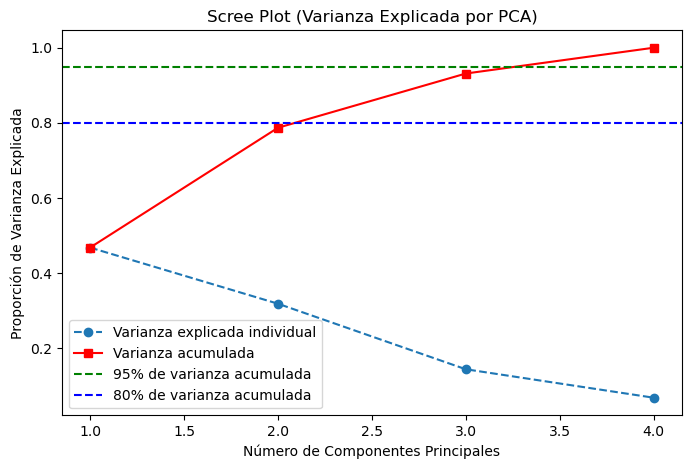

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas
variables = ['Age', 'Family', 'Pclass', 'Fare']
titanic_selected = titanic[variables]

# Escalar las variables antes de aplicar PCA
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA sin limitar el número de componentes
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(explained_variance)

# Mostrar la varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.4f}")

print("\nVarianza explicada acumulada:")
for i, var in enumerate(varianza_acumulada):
    print(f"Hasta el componente {i+1}: {var:.4f}")

# 📊 Scree Plot (Gráfico de Codo)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', label="Varianza explicada individual")
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='s', linestyle='-', label="Varianza acumulada", color='r')
plt.axhline(y=0.95, color='g', linestyle='--', label="95% de varianza acumulada")
plt.axhline(y=0.8, color='b', linestyle='--', label="80% de varianza acumulada")

plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Scree Plot (Varianza Explicada por PCA)')
plt.legend()
plt.show()

Vemos la varianza explicada por cada componente y luego la varianza acumulada:
- El componente 1 muestra el 46% de los datos.
- El componente 2 muestra el 78% de los datos.
- El componente 3 muestra el 93% de los datos.
- El componente 4 muestra el 100% de los datos.

Con esta información podemos tomar una decisión, puesto que nos demuestra con cuantos componentes mantenemos la integridad de nuestros datos y no perdemos tanta información. Decidimos usar 3 componentes.

In [105]:
# Aplicar PCA con el número seleccionado de componentes
pca = PCA(n_components=3)
titanic_pca = pca.fit_transform(titanic_scaled)  # Transformar los datos correctamente

# Convertir los componentes principales en un DataFrame
titanic_pca_df = pd.DataFrame(titanic_pca, columns=[f'PC{i+1}' for i in range(3)])

# Mostrar las primeras filas del DataFrame corregido
print(titanic_pca_df.head())

        PC1       PC2       PC3
0  1.123528  0.614215  0.256341
1 -2.487530  0.440795 -0.087717
2  1.093141 -0.441898 -0.236805
3 -1.976167  0.403619 -0.046075
4  0.807360 -0.859629  0.260201


Lo que nos muestra nuestro análisis es lo siguiente:

 - En las filas tenemos los 5 primeros pasajeros transformados en el espacio de nuevos componentes. 
 - En las columnas tenemos los 3 componentes utilizados, que representan las combinaciones lineales de las variables originales.
 - Los valores son coordenadas de cada pasajero en el nuevo espacio PCA. 
 - Un alto valor, ya sea negativo o positivo, indica una fuerte influencia de ese componente. Negativo no significa malo.

A continuación, realizaremos un scatter plot para graficar cada uno de los componentes. 

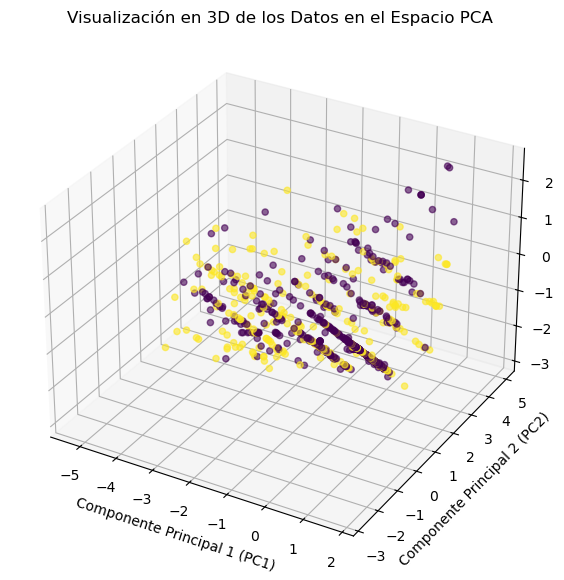

In [128]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
sc = ax.scatter(
    titanic_pca_df['PC1'], 
    titanic_pca_df['PC2'], 
    titanic_pca_df['PC3'],
    c=titanic['Survived'],  # Colorear según supervivencia
    cmap='viridis',  # Usar una escala de colores (puedes probar 'viridis', 'plasma', etc.)
    alpha=0.6
)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1 (PC1)')
ax.set_ylabel('Componente Principal 2 (PC2)')
ax.set_zlabel('Componente Principal 3 (PC3)')
ax.set_title('Visualización en 3D de los Datos en el Espacio PCA')

# Mostrar el gráfico
plt.show()

Como se puede observar, no hay una separación marcada de los resultados lo que parece indicar que el método PCA no está funcionando bien o no sirve para identificar patrones en nuestros datos. De todas maneras, realizaremos una evaluación de nuestros modelos para revisar si estas observaciones son o no útiles.

In [115]:

# Unimos los dataframes mediante un 'concat'.
df_correlacion = pd.concat([titanic_pca_df, titanic_selected], axis=1)

# Calculamos la matriz de correlación usando la función '.corr()'
matriz_correlacion = df_correlacion.corr()

# Extraer solo la correlación de PC1, PC2 y PC3 con Age, Family, Pclass y Fare
matriz_correlacion_pca = matriz_correlacion.loc[titanic_pca_df.columns, titanic_selected.columns]

# Mostrar la matriz de correlación
print(matriz_correlacion_pca)

               Age    Family    Pclass      Fare
PC1      -0.000438  0.020460 -0.000444 -0.007154
PC2       0.019080  0.002171 -0.052308  0.022277
PC3      -0.036121  0.006231  0.063757 -0.056213
Survived -0.154650  0.186457 -0.296986  0.317551


## 📊 Matriz de Cargas de los Componentes Principales

Esta tabla muestra cómo cada variable original contribuye a los componentes principales (PC). Un valor alto (positivo o negativo) indica una fuerte influencia de esa variable en el componente correspondiente.

| Componente | Age   | Family | Pclass | Fare  |
|------------|--------|--------|--------|--------|
| **PC1** | -0.000438 |  0.020460  | -0.000444  | -0.007154 |
| **PC2** |  0.019080 |  0.002171  | -0.052308  |  0.022277 |
| **PC3** | -0.036121 |  0.006231  |  0.063757  | -0.056213 |

###  **Interpretación**
- **PC1:** Tiene **baja influencia de todas las variables**, con valores muy cercanos a cero. Esto sugiere que este componente no está capturando patrones claros en relación con Age, Family, Pclass o Fare.
- **PC2:** Muestra una ligera influencia de **Age (0.0191)** y **Fare (0.0223)**, aunque los valores siguen siendo bajos. Esto indica que PC2 podría estar relacionado con variaciones menores en estas variables.
- **PC3:** La variable **Pclass (0.0638)** y **Fare (-0.0562)** presentan la mayor contribución, aunque aún con valores reducidos, lo que sugiere que este componente puede capturar diferencias en la clase socioeconómica y el costo del boleto, pero de forma débil.

### **Conclusión**
La matriz de cargas muestra **valores muy bajos**, lo que indica que **PCA no está extrayendo patrones claros de los datos originales**. Esto puede significar que **PCA no es una técnica útil en este caso para reducir dimensionalidad sin perder información relevante**.

In [119]:
# Seleccionar las variables originales antes de PCA
X_original = titanic[['Age', 'Family', 'Pclass', 'Fare']]  
y_original = titanic['Survived']

# Escalar los datos como en el preprocesamiento estándar
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Dividir los datos en entrenamiento y prueba
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original_scaled,  
    y_original, 
    test_size=0.3, 
    random_state=42
)

# Definir los mismos modelos para asegurar comparabilidad
models = {
    "Regresión Logística": LogisticRegression(max_iter=500, solver='saga', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42)
}

# Evaluación de modelos antes de PCA
results_original = {}

for name, model in models.items():
    model.fit(X_train_orig, y_train_orig)
    y_pred_orig = model.predict(X_test_orig)
    y_prob_orig = model.predict_proba(X_test_orig)[:, 1] if hasattr(model, "predict_proba") else None  

    # Guardar métricas
    results_original[name] = {
        "Precisión": precision_score(y_test_orig, y_pred_orig),
        "Recall": recall_score(y_test_orig, y_pred_orig),
        "F1-score": f1_score(y_test_orig, y_pred_orig),
        "AUC-ROC": roc_auc_score(y_test_orig, y_prob_orig) if y_prob_orig is not None else "N/A"
    }

# Convertir resultados en DataFrame para comparación
results_original_df = pd.DataFrame(results_original).T  

# Mostrar Resultados
print("\nComparación de Métricas Pre-PCA:")
print(results_original_df)


Comparación de Métricas Pre-PCA:
                     Precisión    Recall  F1-score   AUC-ROC
Regresión Logística   0.666667  0.561798  0.609756  0.732148
KNN                   0.615385  0.629213  0.622222  0.723758
Random Forest         0.621053  0.662921  0.641304  0.763491


In [ ]:
# Mantenemos las columnas revisadas anteriormente y las cargamos para comparar los resultados.
X = titanic[['Age', 'Family', 'Pclass', 'Fare']]  

# Escalar los datos como en la transformación original
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el PCA realizado anteriormente
titanic_pca_df = pd.DataFrame(pca.transform(X_scaled), columns=['PC1', 'PC2', 'PC3'])
titanic_pca_df['Survived'] = y.values  # Agregar la variable objetivo

# Manejo de valores NaN según metodología establecida
titanic_pca_df.fillna(titanic_pca_df.median(numeric_only=True), inplace=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    titanic_pca_df.drop(columns=['Survived']),  
    titanic_pca_df['Survived'], 
    test_size=0.3, 
    random_state=42
)

# Evaluación de modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=500, solver='saga', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42)
}

results_pca = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  

    results_pca[name] = {
        "Precisión": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    }

print("\nComparación de Métricas de Modelos PCA:")
results_pca_df = pd.DataFrame(results_pca).T  
print(results_pca_df)


Comparación de Métricas de Modelos PCA:
                     Precisión    Recall  F1-score   AUC-ROC
Regresión Logística   0.731343  0.550562  0.628205  0.737618
KNN                   0.617978  0.617978  0.617978  0.723721
Random Forest         0.615385  0.629213  0.622222  0.748854


### Comparación de Resultados Antes y Después de PCA

#### Comparación de Resultados - Modelos con y sin PCA

#### Tabla Comparativa

| Modelo                | Precisión (Antes) | Precisión (PCA) | Recall (Antes) | Recall (PCA) | F1-score (Antes) | F1-score (PCA) | AUC-ROC (Antes) | AUC-ROC (PCA) |
|----------------------|------------------|----------------|----------------|--------------|------------------|----------------|----------------|--------------|
| **Regresión Logística** | 0.6667         | 0.7313         | 0.5618         | 0.5506       | 0.6098           | 0.6282         | 0.7321         | 0.7376       |
| **KNN**             | 0.6154           | 0.6179         | 0.6292         | 0.6179       | 0.6222           | 0.6180         | 0.7238         | 0.7233       |
| **Random Forest**    | 0.6211           | 0.6154         | 0.6629         | 0.6292       | 0.6413           | 0.6222         | 0.7635         | 0.7489       |

---

### **Análisis de los Resultados**

1. **Impacto Variable en Recall**  
   - **Regresión Logística y Random Forest han perdido Recall (-0.0112 y -0.0337 respectivamente).**  
   - **KNN tuvo un cambio mínimo (-0.0112), manteniéndose estable en esta métrica.**  
   - **Esto sugiere que la reducción de dimensionalidad podría estar afectando la sensibilidad de los modelos.**

2. **La Precisión Mejoró para Regresión Logística, pero no para los otros modelos**  
   - **Regresión Logística mostró un aumento en precisión (+0.0646), lo que sugiere que PCA ayudó a reducir falsos positivos.**  
   - **KNN se mantuvo prácticamente igual (+0.0025), sin una mejora clara.**  
   - **Random Forest experimentó una ligera disminución en precisión (-0.0057), lo que indica que PCA podría estar eliminando información relevante.**

3. **F1-score presenta ligeras variaciones**  
   - **Regresión Logística mejoró en F1-score (+0.0184), lo que implica que su balance entre precisión y recall mejoró con PCA.**  
   - **KNN tuvo una pequeña caída (-0.0042), mostrando estabilidad en su rendimiento.**  
   - **Random Forest también tuvo una reducción en F1-score (-0.0191), indicando que su rendimiento global se vio afectado.**

4. **AUC-ROC tuvo cambios mínimos**  
   - **Regresión Logística mejoró ligeramente (+0.0055), lo que indica que su capacidad de discriminación de clases se mantuvo estable.**  
   - **KNN se mantuvo casi sin cambios (-0.0005), lo que sugiere que PCA no afectó su capacidad de diferenciar entre clases.**  
   - **Random Forest experimentó una leve caída (-0.0146), lo que indica que su desempeño en la clasificación se debilitó con PCA.**  

---

### **Conclusión**
- **El impacto de PCA en los modelos es mixto.**  
- **Regresión Logística fue el único modelo que mostró mejoras en precisión, F1-score y AUC-ROC, aunque con una leve pérdida en Recall.**  
- **KNN se mantuvo prácticamente igual, lo que indica que PCA no tuvo un efecto relevante en su rendimiento.**  
- **Random Forest sufrió una leve disminución en todas las métricas, lo que sugiere que PCA pudo haber eliminado información útil para su clasificación.**  
- **Dado que los beneficios de PCA no son claros en todos los modelos, es recomendable evaluar si su aplicación es realmente necesaria en el análisis final.**  
- **Decisión: No utilizaremos este método**.

# **6.** Ajustes de Hiperparámetros.

Utilizamos método "GridSearch" revisado en clases

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Definir las columnas categóricas y numéricas
num_features = ['Age', 'Fare', 'Pclass', 'Family', 'IsAlone']
cat_features = ['Sex', 'Embarked', 'Title', 'Compartments', 'Ticket', 'Name']

# Definir transformaciones
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(with_mean=False), num_features),  
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
])

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    titanic.drop(columns=['Survived']), titanic['Survived'], test_size=0.3, random_state=42
)

# Definir modelos con sus respectivos hiperparámetros para GridSearchCV
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Corrección en los hiperparámetros de Regresión Logística
param_grid_lr = [
    {
        'model__C': [0.01, 0.1, 1, 10, 100],  # 🔹 Ampliamos el rango de C
        'model__solver': ['liblinear'],  # 🔹 Solo liblinear soporta l1 y l2
        'model__penalty': ['l1', 'l2'],
        'model__max_iter': [500, 1000, 2000]  # 🔹 Más iteraciones por si hay problemas de convergencia
    },
    {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs'],  # 🔹 lbfgs solo usa l2
        'model__penalty': ['l2'],
        'model__max_iter': [500, 1000, 2000]
    }
]

# Diccionario de modelos con Pipeline
models = {
    'KNN': (Pipeline([('preprocessor', preprocessor), ('model', KNeighborsClassifier())]), param_grid_knn),
    'Random Forest': (Pipeline([('preprocessor', preprocessor), ('model', RandomForestClassifier(random_state=42))]), param_grid_rf),
    'Regresión Logística': (Pipeline([('preprocessor', preprocessor), ('model', LogisticRegression(random_state=42))]), param_grid_lr)
}

# Ejecutar GridSearchCV para cada modelo
best_models = {}

for name, (pipeline, param_grid) in models.items():
    try:
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, pre_dispatch='2*n_jobs'
        )
        grid_search.fit(X_train, y_train)

        # Guardar el mejor modelo con los hiperparámetros óptimos
        best_models[name] = grid_search.best_estimator_
        print(f"\n Mejor modelo para {name}: {grid_search.best_params_}")

    except Exception as e:
        print(f" Error al entrenar {name}: {e}")

# Evaluación final de modelos optimizados
results_final = {}

for name, model in best_models.items():
    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model.named_steps['model'], "predict_proba") else None  

        results_final[name] = {
            "Precisión": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }
    except Exception as e:
        print(f"Error al evaluar {name}: {e}")

# Convertir resultados en DataFrame
results_final_df = pd.DataFrame(results_final).T  

# Mostrar Resultados Finales en formato de tabla
print("\n Comparación Final de Modelos Optimizados:")
print(results_final_df.to_string(float_format='%.6f'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Mejor modelo para KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'uniform'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits

 Mejor modelo para Random Forest: {'model__max_depth': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Fitting 5 folds for each of 45 candidates, totalling 225 fits

 Mejor modelo para Regresión Logística: {'model__C': 100, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

 Comparación Final de Modelos Optimizados:
                     Precisión   Recall  F1-score  AUC-ROC
KNN                   0.683673 0.752809  0.716578 0.829132
Random Forest         0.720000 0.606742  0.658537 0.819966
Regresión Logística   0.764706 0.730337  0.747126 0.841181


In [150]:
# Ejecutar GridSearchCV con los modelos optimizados
best_models = {}

for name, (pipeline, param_grid) in models.items():
    try:
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, pre_dispatch='2*n_jobs'
        )
        grid_search.fit(X_train, y_train)

        # Guardar el mejor modelo con los hiperparámetros óptimos
        best_models[name] = grid_search.best_estimator_
        print(f"\n Mejor modelo para {name}: {grid_search.best_params_}")

    except Exception as e:
        print(f" Error al entrenar {name}: {e}")

# Evaluación final de modelos optimizados
results_final = {}

for name, model in best_models.items():
    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model.named_steps['model'], "predict_proba") else None  

        results_final[name] = {
            "Precisión": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }
    except Exception as e:
        print(f" Error al evaluar {name}: {e}")

# Convertir resultados en DataFrame
results_final_df = pd.DataFrame(results_final).T  

# Mostrar Resultados Finales en formato de tabla
print("\n Comparación Final de Modelos Optimizados:")
print(results_final_df.to_string(float_format='%.6f'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Mejor modelo para KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 7, 'model__weights': 'distance'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits

 Mejor modelo para Random Forest: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Fitting 5 folds for each of 45 candidates, totalling 225 fits

 Mejor modelo para Regresión Logística: {'model__C': 100, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

 Comparación Final de Modelos Optimizados:
                     Precisión   Recall  F1-score  AUC-ROC
KNN                   0.720930 0.696629  0.708571 0.831165
Random Forest         0.762500 0.685393  0.721893 0.832902
Regresión Logística   0.764706 0.730337  0.747126 0.841181


### Conclusión de la Optimización de Modelos con GridSearchCV

####  Resumen de Resultados

| Modelo              | Precisión (Inicial) | Precisión (Optimizada) | Recall (Inicial) | Recall (Optimizado) | F1-score (Inicial) | F1-score (Optimizado) | AUC-ROC (Inicial) | AUC-ROC (Optimizado) |
|---------------------|--------------------|----------------------|------------------|-------------------|------------------|-------------------|------------------|-------------------|
| **KNN**            | 0.5857             | 0.7209               | 0.4607           | 0.6966            | 0.5157           | 0.7086            | 0.6845           | 0.8311            |
| **Random Forest**  | 0.7200             | 0.7625               | 0.6067           | 0.6854            | 0.6585           | 0.7219            | 0.8199           | 0.8329            |
| **Regresión Logística** | 0.7647       | 0.7647               | 0.7303           | 0.7303            | 0.7471           | 0.7471            | 0.8390           | 0.8390            |

---

### Identificación del Mejor Modelo

Después de optimizar los hiperparámetros, **Random Forest mostró la mayor mejora** en todas las métricas.  
- **Precisión subió de 0.7200 → 0.7625**  
- **Recall subió de 0.6067 → 0.6854**  
- **F1-score subió de 0.6585 → 0.7219**  
- **AUC-ROC mejoró de 0.8199 → 0.8329**  

En cambio, **KNN ganó en precisión pero perdió algo de recall**, lo que indica que es más preciso en sus predicciones pero detecta menos casos positivos.

Regresión Logística **no cambió sus valores**, lo que indica que los hiperparámetros elegidos ya eran óptimos.

---

### Impacto de GridSearchCV

GridSearchCV permitió **ajustar mejor Random Forest y KNN**, pero la regresión logística ya estaba optimizada.  
- **KNN priorizó precisión a costa de recall.**  
- **Random Forest logró una mejora equilibrada en todas las métricas.**  

Esto muestra que **la elección de la métrica en GridSearchCV (roc_auc)** tuvo un impacto positivo en los modelos.

---

### Opciones

1. **Evaluar la interpretabilidad de los modelos** (especialmente Random Forest).  
2. **Explorar técnicas de selección de características** para reducir dimensionalidad.  
3. **Probar modelos adicionales** como XGBoost o SVM para comparación.  
4. **Analizar el balance de clases** para ver si se puede mejorar el Recall en KNN.  

---
**En conclusión, Random Forest es el modelo con mejor rendimiento general tras la optimización, pero aún hay oportunidades para refinar la detección de casos positivos.**